# Problem statement
### Salary Prediction

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.

In [1]:
import numpy as np # mathematical calculation
import pandas as pd  # data preprocessing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization

In [2]:
df = pd.read_csv("adult_data.csv")# mounting the data
df.head()#show the data features 

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  salary  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [3]:
#return the columns 
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [4]:
#get the number of column 
len(df.columns)

15

In [5]:
# display information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# display number of rows and column 
df.shape

(32561, 15)

In [7]:
df.head(5)

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  salary  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [8]:
# Display statical infromation 
df.describe()

age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000

<Axes: xlabel=' salary', ylabel='count'>

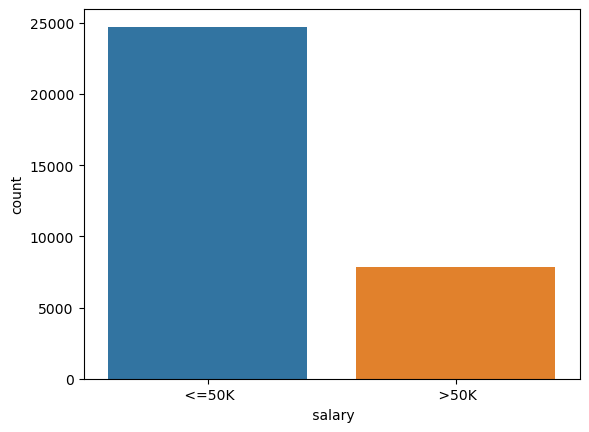

In [9]:
#Displaying count plot based on salary 
sns.countplot(x=' salary',data=df )

In [10]:
#used to obtain the count of unique values 
df[" salary"].value_counts()

 <=50K    24720
 >50K      7841
Name:  salary, dtype: int64

In [11]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [12]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [13]:
#display columns form data frame 
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [14]:
numerical

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [15]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
  fnlwgt  :  21648
  education-num  :  16
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


In [16]:
#Display the unique value in eduaction-num
df[" education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

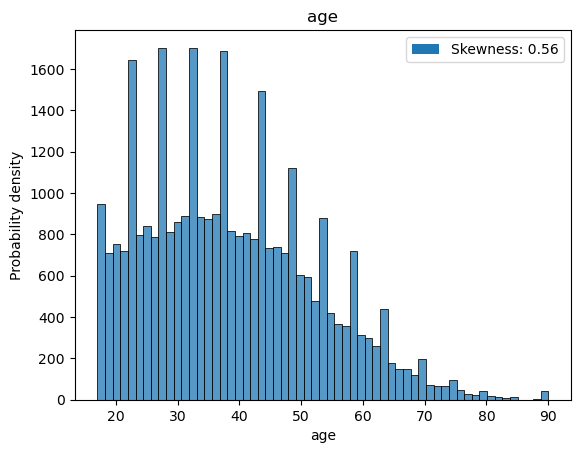

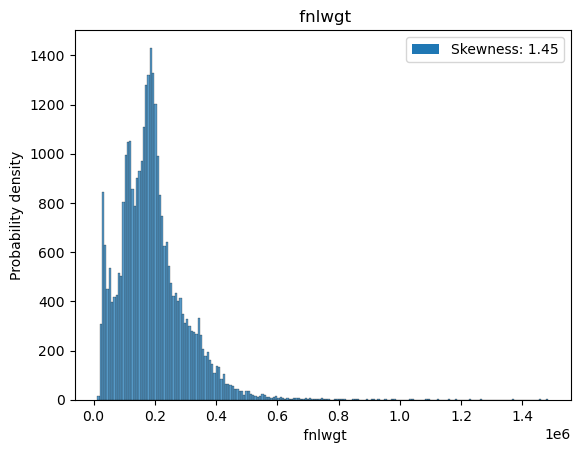

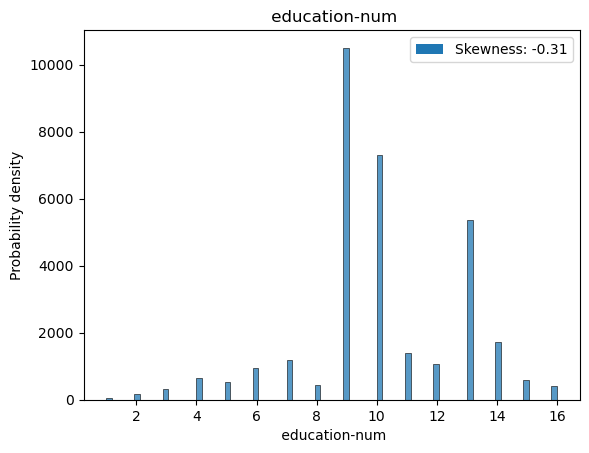

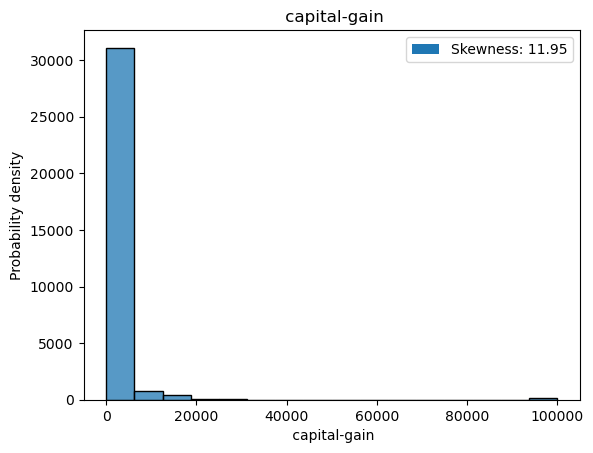

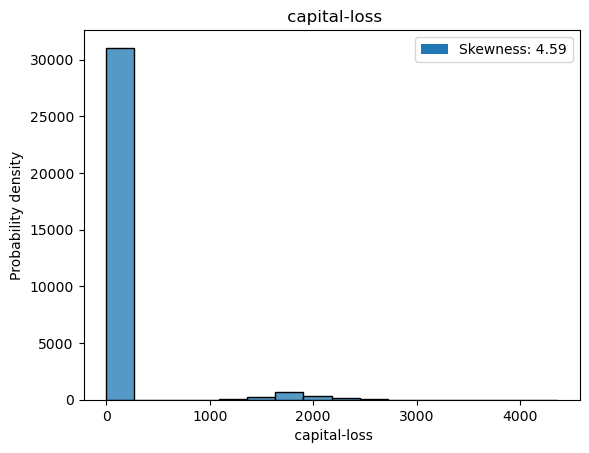

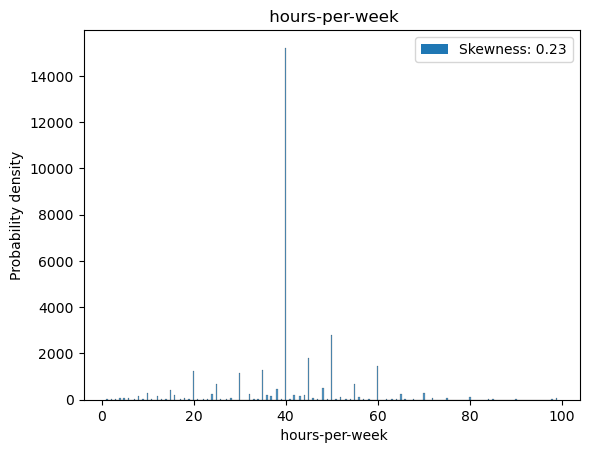

In [17]:
# DIsplay the histrogram for each numeric features.
for feature in numerical:
    bar = sns.histplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

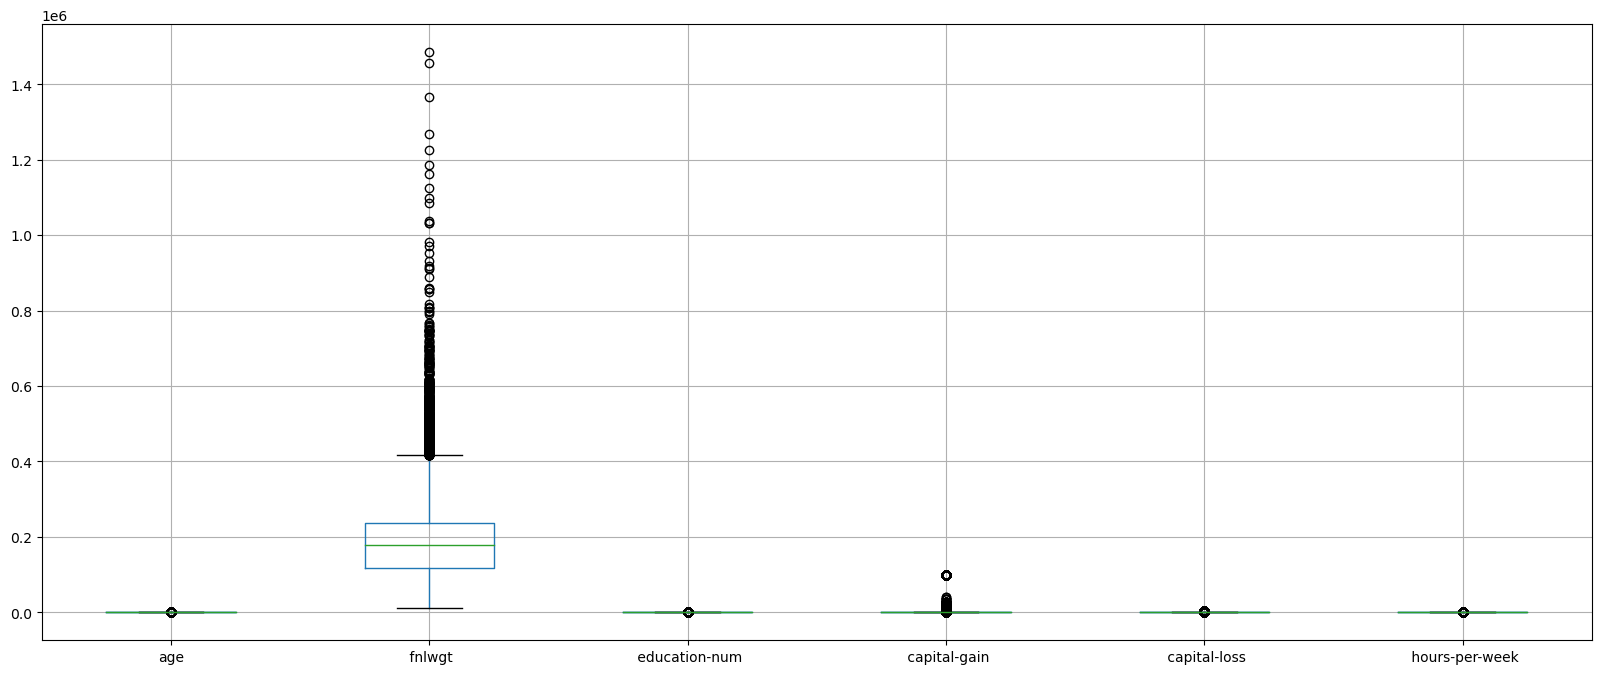

In [18]:
#measuring outlier
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

In [19]:
#Display the lower and upper outlier values
for i in df:
  if(df[i].dtypes!='O'):
      q1=df[i].quantile(0.25)
      q3=df[i].quantile(0.75)
      iqr=q3-q1
      upper=q3+1.5*iqr
      lower=q1-1.5*iqr
      totalUpper=len(df[df[i]>upper])
      totalLower=len(df[df[i]<lower])
      print(f'Lower values in {i} {totalLower}')
      print(f'Upper values in {i} {totalUpper}')

Lower values in age 0
Upper values in age 143
Lower values in  fnlwgt 0
Upper values in  fnlwgt 992
Lower values in  education-num 1198
Upper values in  education-num 0
Lower values in  capital-gain 0
Upper values in  capital-gain 2712
Lower values in  capital-loss 0
Upper values in  capital-loss 1519
Lower values in  hours-per-week 5516
Upper values in  hours-per-week 3492


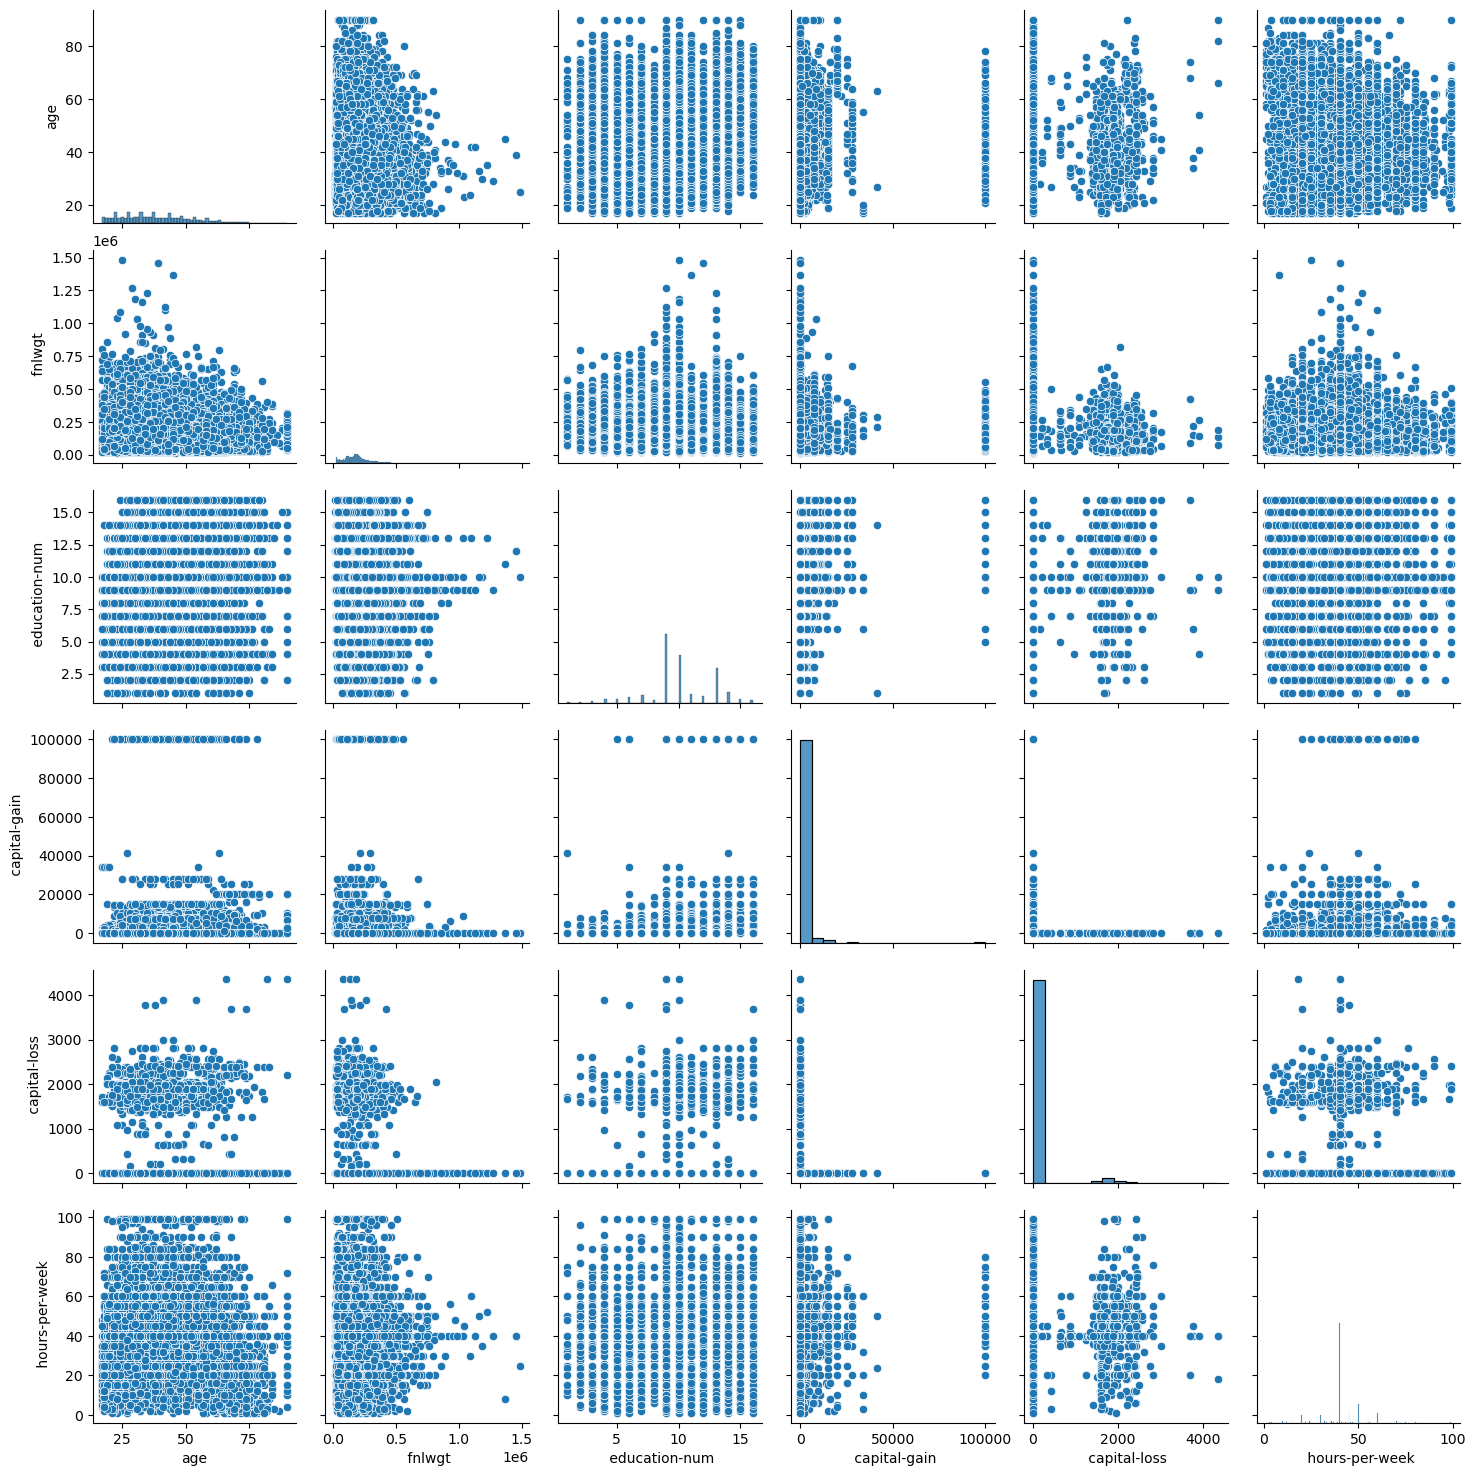

In [20]:
#Ploting the pair plots of the dataset
sns.pairplot(df)

In [21]:
#This code will replace the "age" and "fnlwgt" columns in the DataFrame 'df' with their natural logarithms.
df["age"] = np.log(df["age"])
df[" fnlwgt"] = np.log(df[" fnlwgt"])

In [22]:
df.columns# display the columns 

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

## Handling categorical data 

In [23]:
#Display the names of all columns in the DataFrame df that have an object or categorical data type.
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [24]:
#Display the each categorcial features and unique value 
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  marital-status  :  7
  occupation  :  15
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  42
  salary  :  2


In [25]:
#this code will print the value counts for each unique value in that feature and then add two empty lines to separate the output between features.
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         409

## Handling missing values in categorical features

In [26]:
# Display the percentage of occurrences of specific values in categorical columns
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [27]:
df[" occupation"].mode()[0]

' Prof-specialty'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [28]:
# Replace '?' with the specified values and set regex=False
df[" workclass"] = df[' workclass'].str.replace('?', 'Private', regex=False)
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty', regex=False)
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States', regex=False)

In [29]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [30]:
#martial status
df[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [31]:
# income
df[" salary"] = df[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [32]:
df.head()

age          workclass     fnlwgt   education   education-num  \
0  3.663562          State-gov  11.258240   Bachelors              13   
1  3.912023   Self-emp-not-inc  11.330336   Bachelors              13   
2  3.637586            Private  12.281393     HS-grad               9   
3  3.970292            Private  12.366153      school               7   
4  3.332205            Private  12.732011   Bachelors              13   

   marital-status          occupation    relationship    race      sex  \
0   Never-married        Adm-clerical   Not-in-family   White     Male   
1         married     Exec-managerial         Husband   White     Male   
2           other   Handlers-cleaners   Not-in-family   White     Male   
3         married   Handlers-cleaners         Husband   Black     Male   
4         married      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country   salary  
0           2174              0               40   United-States        0  
1              0              0               13   United-States        0  
2              0              0               40   United-States        0  
3              0              0               40   United-States        0  
4              0              0               40            Cuba        0

In [33]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  8
  education  :  6
  marital-status  :  3
  occupation  :  14
  relationship  :  6
  race  :  5
  sex  :  2
  native-country  :  41
  salary  :  2


In [34]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

C:\Users\subed\AppData\Local\Temp\ipykernel_12804\2448820308.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


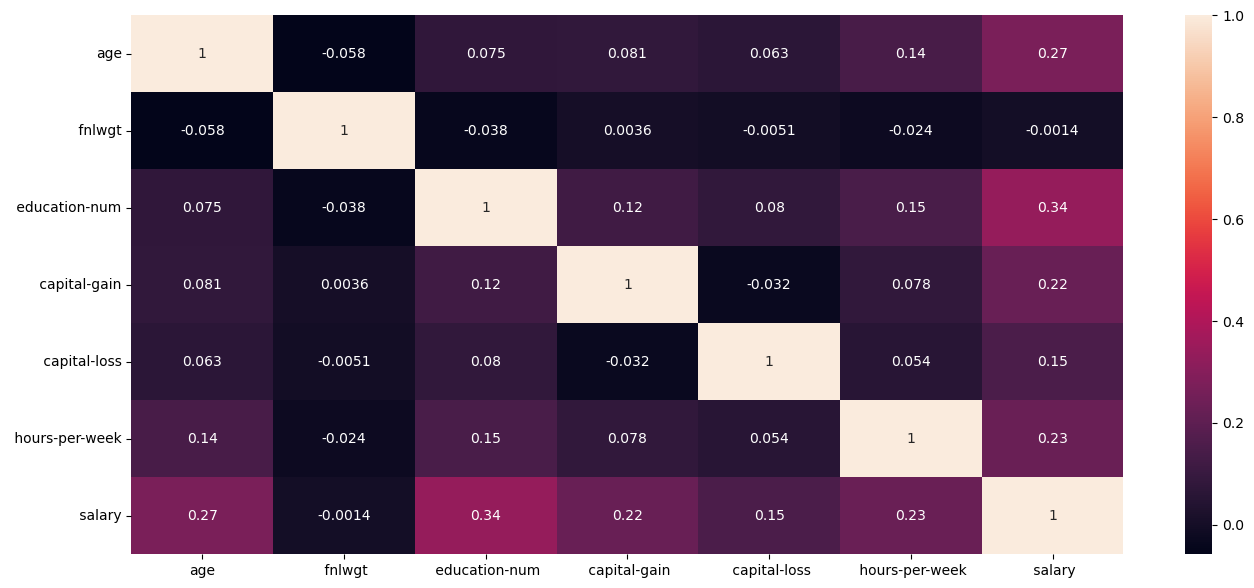

In [35]:
# Display the  heatmap using Seaborn to visualize the correlation matrix 
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [36]:
# importing libraries 
from sklearn.preprocessing import  LabelEncoder

In [37]:
#change the categorical or text data with numerical values 
df = df.apply(LabelEncoder().fit_transform)
df .head()

age   workclass   fnlwgt   education   education-num   marital-status  \
0   22           6     2671           0              12                0   
1   33           5     2926           0              12                1   
2   21           3    14086           2               8                2   
3   36           3    15336           5               6                1   
4   11           3    19355           0              12                1   

    occupation   relationship   race   sex   capital-gain   capital-loss  \
0            0              1      4     1             25              0   
1            3              0      4     1              0              0   
2            5              1      4     1              0              0   
3            5              0      2     1              0              0   
4            9              5      2     0              0              0   

    hours-per-week   native-country   salary  
0               39               38        0  
1               12               38        0  
2               39               38        0  
3               39               38        0  
4               39                4        0

In [39]:
X_train = df.iloc[:,:-1]
y_train = df[" salary"]

## Feature engineering on test data

In [40]:
df_test = pd.read_csv("adult_test.csv")
df_test.head()

age   workclass   fnlwgt      education   education-num  \
0   25     Private   226802           11th               7   
1   38     Private    89814        HS-grad               9   
2   28   Local-gov   336951     Assoc-acdm              12   
3   44     Private   160323   Some-college              10   
4   18           ?   103497   Some-college              10   

        marital-status          occupation  relationship    race      sex  \
0        Never-married   Machine-op-inspct     Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing       Husband   White     Male   
2   Married-civ-spouse     Protective-serv       Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct       Husband   Black     Male   
4        Never-married                   ?     Own-child   White   Female   

    capital-gain   capital-loss   hours-per-week  native-country   salary  
0              0              0               40   United-States   <=50K.  
1              0              0               50   United-States   <=50K.  
2              0              0               40   United-States    >50K.  
3           7688              0               40   United-States    >50K.  
4              0              0               30   United-States   <=50K.

In [41]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test[" fnlwgt"] = np.log(df_test[" fnlwgt"])

## handling missing values in categorical variable
df_test[" workclass"] = df_test[' workclass'].str.replace('?', 'Private' )
df_test[' occupation'] = df_test[' occupation'].str.replace('?', 'Prof-specialty' )
df_test[' native-country'] = df_test[' native-country'].str.replace('?', 'United-States' )

# education Category
df_test[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)


# income
df_test[" salary"] = df_test[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

C:\Users\subed\AppData\Local\Temp\ipykernel_12804\612423593.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test[" workclass"] = df_test[' workclass'].str.replace('?', 'Private' )
C:\Users\subed\AppData\Local\Temp\ipykernel_12804\612423593.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test[' occupation'] = df_test[' occupation'].str.replace('?', 'Prof-specialty' )
C:\Users\subed\AppData\Local\Temp\ipykernel_12804\612423593.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test[' native-country'] = df

In [42]:
# Display the first five row 
df_test.head()

age   workclass   fnlwgt   education   education-num   marital-status  \
0    8           3     8931           5               6                0   
1   21           3     1888           2               8                1   
2   11           1    11540           4              11                1   
3   27           3     5146           4               9                1   
4    1           3     2450           4               9                0   

    occupation   relationship   race   sex   capital-gain   capital-loss  \
0            6              3      2     1              0              0   
1            4              0      4     1              0              0   
2           10              0      4     1              0              0   
3            6              0      2     1             90              0   
4            9              3      4     0              0              0   

    hours-per-week   native-country   salary  
0               39               37        0  
1               49               37        0  
2               39               37        1  
3               39               37        1  
4               29               37        0

In [43]:
df_test.shape

(16281, 15)

In [44]:
#separates the features (in X_test) from the target variable (in y_test) 
X_test = df_test.iloc[:,:-1]
y_test = df_test[" salary"]

In [45]:
# improve the performance and stability
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7670904735581352

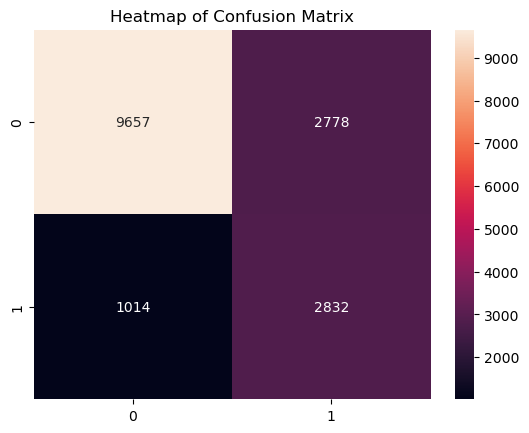

In [48]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     12435
           1       0.50      0.74      0.60      3846

    accuracy                           0.77     16281
   macro avg       0.70      0.76      0.72     16281
weighted avg       0.81      0.77      0.78     16281



## Random Forest

In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8474295190713101

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.74      0.55      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



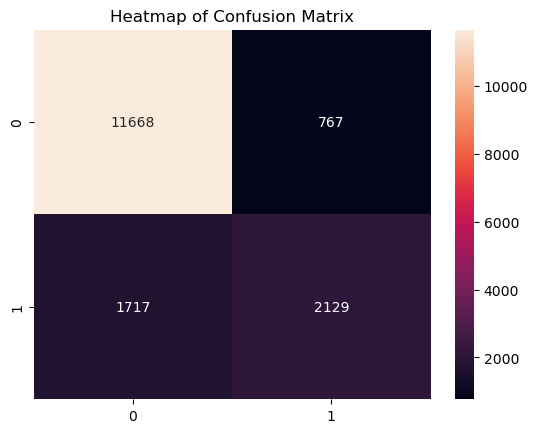

In [52]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# Support Vector Regression 

In [53]:
#from sklearn.svm import SVR
#from sklearn import metrics
#modelSVR = SVR(kernel='linear')

#modelSVR.fit(X_train,y_train)
#y_pred=modelSVR.predict(X_test)

#error_score = metrics.r2_score(y_test, y_pred) # coefficient of determination, regression score function.
#print('R squared error : ', error_score)


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_model =KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)




In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12435
           1       0.67      0.59      0.63      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.75      0.76     16281
weighted avg       0.83      0.83      0.83     16281



# After testing the 4 model KNN , random forest, Support vector Regression and logistic regression.
Random forest got the highest accuracy. 